## Covid 19 Case Data - United States (CA & IN focus)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import csv
import gmaps
from us import states
import numpy as np
import requests
from config import gkey
from config import rapid_api_key
from config import rapidapi_host
from pprint import pprint
import datetime as dt

In [2]:
pd.options.display.max_rows = 200
# pd.options.display.max_rows

In [3]:
# os.getcwd()
# os.chdir('C:\\gitlab\\covid19')

In [4]:
#Import files to use with API's
county_path = 'Resources/us_counties_states.csv'
date_path = 'Resources/dates.csv'

In [5]:
# us_counties_df = pd.read_csv(county_path)
# Create a filter to bring in only California and Indiana
# mask1 = us_counties_df['State'] != 'California'
# mask2 = us_counties_df['State'] != 'Indiana'
# us_counties_df = us_counties_df[mask1 & mask2]
# us_counties_df.head()
us_counties_df = pd.read_csv(county_path)

In [6]:
date_df = pd.read_csv(date_path)

In [7]:
# mask1 = date_df['Date']>'2020-10-10'
# date_df=date_df[mask1]
# date_df.head()

### API Calls to Pull Coronavirus Data by County

In [8]:
county_list = []
state_list = []
county_list = us_counties_df['County, State'].tolist()
# date_list = date_df['Date'].tolist()
# date_list = ['2020-10-24']

date_list = []
rundate = dt.date.today() - dt.timedelta(days=1)
rundate = f'{rundate.year}-{rundate.month}-{rundate.day}'
date_list.append(rundate)
date_list

['2020-10-25']

In [9]:
# state='Indiana'
# county='Fulton'
# date_val = rundate
# country_state = "US " + state
# #  "city_name":county,

# url = "https://covid-19-statistics.p.rapidapi.com/reports"
# headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}
# querystring = {"region_province":state,"iso":"USA","region_name":"US", "city_name":county, \
#                            "date":date_val,"q":country_state}   

# response = requests.request("GET", url, headers=headers, params=querystring).json()

# pprint(response)

In [10]:
# # Run API to collect county level data
# url = "https://covid-19-statistics.p.rapidapi.com/reports"
# headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

# # Map County Lists
# map_county_state_list = []
# map_new_county_list = []
# map_tot_county_cases = []
# map_new_county_cases = []
# map_tot_county_deaths = []
# map_new_county_deaths = []
# map_county_date = []
# map_county_lat = []
# map_county_lng = []

# # County Lists
# county_state_list = []
# new_county_list = []
# tot_county_cases = []
# new_county_cases = []
# tot_county_deaths = []
# new_county_deaths = []
# county_date = []
# county_lat = []
# county_lng = []

# record_counter = 0
# set_counter = 1

# for date_val in date_list:    
#     try:        
# #         set_counter += 1

#         for name in county_list:
#             value = name.split(',')
#             county = value[0]
#             state = value[1]
#             country_state = "US " + state
#             record_counter +=1

#             querystring = {"region_province":state,"iso":"USA","region_name":"US","city_name":county, \
#                            "date":date_val,"q":country_state}   

#             response = requests.request("GET", url, headers=headers, params=querystring).json()    

#             try:
#                 # Add Map information
#                 map_county_state_list.append(response['data'][0]['region']['province'])
#                 map_new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
#                 map_tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
#                 map_new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
#                 map_tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
#                 map_new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
#                 map_county_date.append(response['data'][0]['region']['cities'][0]['date'])
#                 map_county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
#                 map_county_lng.append(response['data'][0]['region']['cities'][0]['long'])

#                 # Add County information
#                 county_state_list.append(response['data'][0]['region']['province'])
#                 new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
#                 tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
#                 new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
#                 tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
#                 new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
#                 county_date.append(response['data'][0]['region']['cities'][0]['date'])
#                 county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
#                 county_lng.append(response['data'][0]['region']['cities'][0]['long'])

#                 if record_counter > len(county_list):
#                     record_counter = 1
#                     set_counter += 1

#                 print(f'Processing record {record_counter} of set {set_counter} | {county}, {state}, {date_val}.')

#             except:
#                 record_counter -= 1
#                 print(f'Error: County: {county} and State:{state} not found for: {date_val}')
                
#         set_counter += 1
        
#     except:
#         print(f'Date Error: {date_val} was not processed')
            
# print(f'---------------------------------Process Completed----------------------------------------')


In [11]:
# Create dataframe for county level map data
# map_covid_county_new_df = pd.DataFrame({
#     "State" : map_county_state_list,
#     "County" : map_new_county_list,
#     "Total Cases" : map_tot_county_cases,
#     "New Cases" : map_new_county_cases,
#     "Total Deaths" : map_tot_county_deaths,
#     "New Deaths" : map_new_county_deaths,
#     "Date" : map_county_date,
#     "Latitude" : map_county_lat,
#     "Longitude" : map_county_lng   
# })

# map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='w', index=False, header=True)

In [12]:
# Create dataframe for county level data
# covid_county_new_df = pd.DataFrame({
#     "State" : county_state_list,
#     "County" : new_county_list,
#     "Total Cases" : tot_county_cases,
#     "New Cases" : new_county_cases,
#     "Total Deaths" : tot_county_deaths,
#     "New Deaths" : new_county_deaths,
#     "Date" : county_date,
#     "Latitude" : county_lat,
#     "Longitude" : county_lng   
# })

# covid_county_new_df.to_csv('Resources/covid_county_df.csv', mode='a', index=False, header=False)

### API Calls to Pull Coronavirus Data by State

In [13]:
# Use this API call to get the state information without the county level detail
# us_state_df = pd.read_csv('Resources/us_counties_states.csv')

# state_list = []

# s_list = us_state_df['State'].tolist()

# for item in s_list:
#     if item not in state_list:
#         state_list.append(item)

# # State lists
# new_state = []
# total_cases_state = []
# new_cases_state = []
# tot_deaths_state = []
# new_deaths_state = []
# fatality_rate_state = []
# date_state = []
# lat_state = []
# long_state = []

# url = "https://covid-19-statistics.p.rapidapi.com/reports"
# headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

# state_record_counter = 0
# state_set_counter = 0

# for date_val in date_list:
    
#     try:    
#         state_set_counter += 1
    
#         for state in state_list:
            
#             state_record_counter +=1
            
#             try:                
#                 querystring = {"iso":"USA", "region_province":state, "date":date_val}                
#                 response = requests.request("GET", url, headers=headers, params=querystring).json()

#                 new_state.append(response['data'][0]['region']['province'])
#                 lat_state.append(response['data'][0]['region']['lat'])
#                 long_state.append(response['data'][0]['region']['long'])
#                 total_cases_state.append(response['data'][0]['confirmed'])
#                 new_cases_state.append(response['data'][0]['confirmed_diff'])
#                 tot_deaths_state.append(response['data'][0]['deaths'])
#                 new_deaths_state.append(response['data'][0]['deaths_diff'])
#                 fatality_rate_state.append(response['data'][0]['fatality_rate'])
#                 date_state.append(response['data'][0]['date']) 
                
#                 if state_record_counter > len(state_list):
#                     state_record_counter = 1
# #                     state_set_counter += 1
                    
#                 print(f'Processing record {state_record_counter} for set {state_set_counter} | {state} - {date_val}')
                
#             except:
#                 state_record_counter -= 1
#                 print(f'State error: {state} not found for {date_val}')
            
#     except:        
#         print(f'Date error: {state} is not found for {date_val}')
              
# print(f'---------------------------------Process Completed----------------------------------------')

In [14]:
# Create dataframe based on state data
# covid_state_new_df = pd.DataFrame({
#     "State" : new_state,
#     "Total Cases" : total_cases_state,
#     "New Cases" : new_cases_state,
#     "Total Deaths" : tot_deaths_state,
#     "New Deaths" : new_deaths_state,
#     "Fatality Rate" : fatality_rate_state,
#     "Latitude" : lat_state,
#     "Longitude" : long_state,
#     "Date" : date_state    
# })    

# covid_state_new_df.to_csv('Resources/covid_state_df.csv', mode='a', index=False, header=False )

In [15]:
# Import data from .csv files and create dataframes for state and county
state_data_path = 'Resources/covid_state_df.csv'
county_data_path = 'Resources/covid_county_df.csv'
map_county_data_path = 'Resources/map_covid_county_df.csv'

# Create dataframes based on csv file values generated via API calls
covid_state_df = pd.read_csv(state_data_path, index_col='State')
covid_county_df = pd.read_csv(county_data_path, index_col='State')
state_plots_df = pd.read_csv(state_data_path, index_col='Date')
map_county_df = pd.read_csv(map_county_data_path, index_col = 'State')

## Total Coronavirus Case Trend in the United States

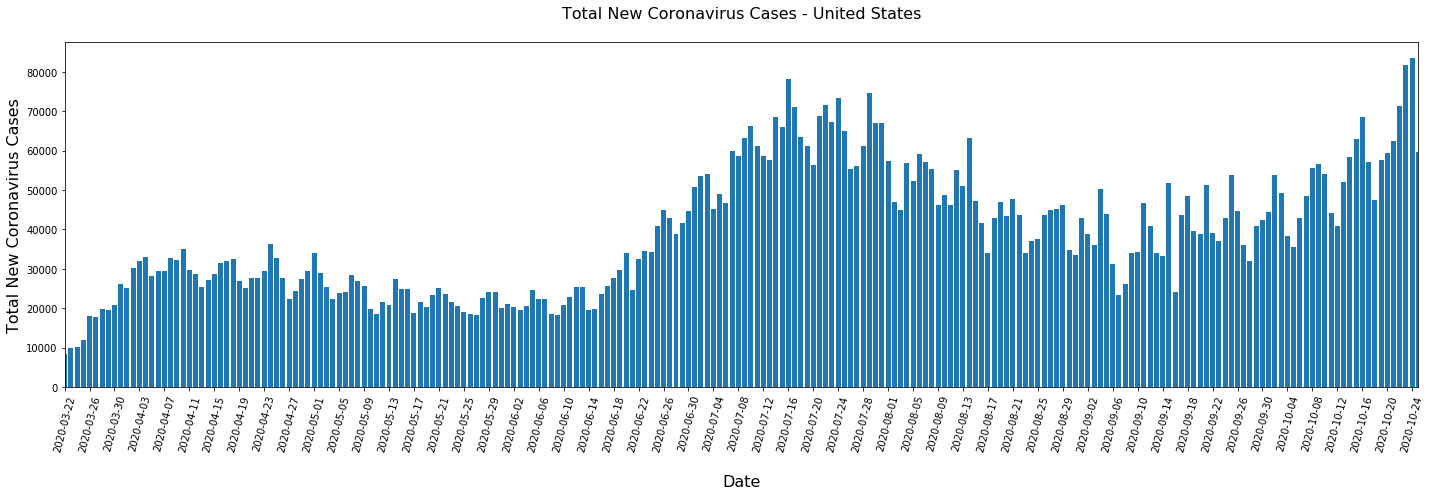

In [16]:
# Create a dataframe to show the trend of total US coronavirus cases by date
tot_us_cases_trend_df = covid_state_df.reset_index().set_index('Date')
tot_cases_gb = tot_us_cases_trend_df.groupby('Date')
tot_us_cases_trend_df = tot_cases_gb[['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths']].sum()
#Export dataframe to .csv file
tot_us_cases_trend_df.to_csv('Resources/tot_us_cases_trend_df.csv')

# Plot the new cases US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Cases'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-03-22',max_date])

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Cases - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Cases', fontsize=16)
plt.tight_layout()

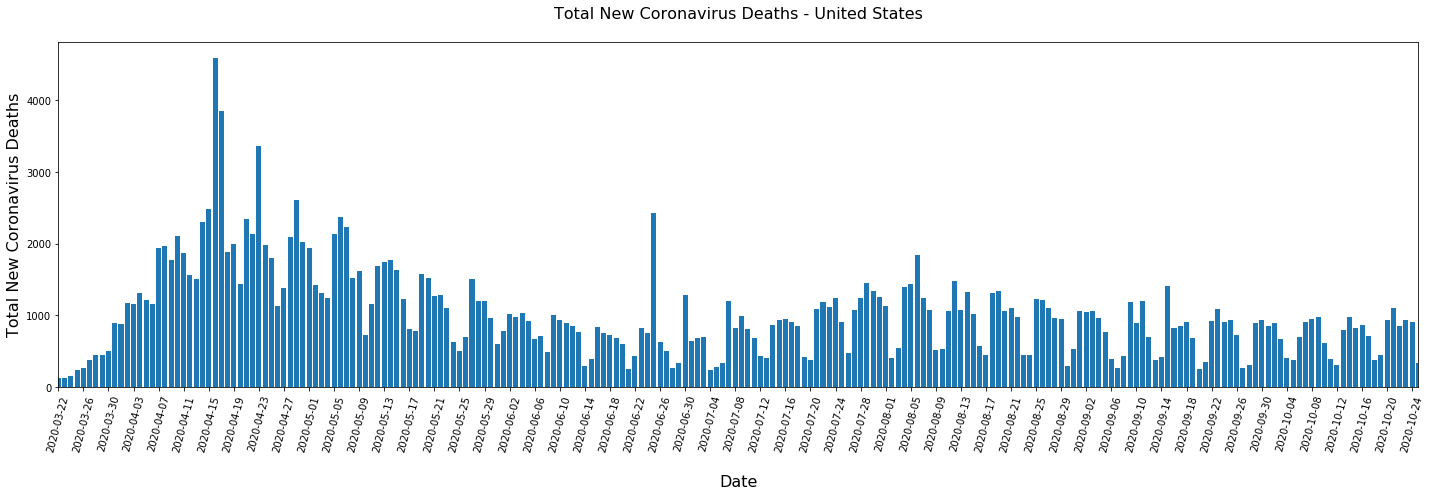

In [17]:
# Plot the new deaths US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Deaths'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-03-22',max_date])

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Deaths - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Deaths', fontsize=16)
plt.tight_layout()

### Total New Cases and New Deaths in The United States

In [18]:
state_group = covid_state_df.groupby('State')
covid_state_df=covid_state_df.sort_values(by='Date', ascending=False)
last_state_date_df = state_group.last()

# Show the total cases in the US
total_us_cases = last_state_date_df['Total Cases'].sum()
new_us_cases = last_state_date_df['New Cases'].sum()
total_us_deaths = last_state_date_df['Total Deaths'].sum()
new_us_deaths = last_state_date_df['New Deaths'].sum()
date = last_state_date_df['Date'].max()

print(f'Coronavirus stats for The United States as of: {date}')
print("\n"f'Total US Cases: {total_us_cases:,}')
print(f'Total New US Cases: {new_us_cases:,}')
print(f'Total US Deaths: {total_us_deaths:,}')
print(f'Total New US Deaths: {new_us_deaths:,}')

Coronavirus stats for The United States as of: 2020-10-25

Total US Cases: 8,567,736
Total New US Cases: 59,566
Total US Deaths: 224,333
Total New US Deaths: 333


### Seven Day Average of New Cases and New Deaths in The United States

In [19]:
us_avg = covid_state_df.reset_index()[['Date', 'New Cases', 'New Deaths']]
us_avg = us_avg.sort_values('Date', ascending=False)
us_avg_gb = us_avg.groupby('Date')
us_avg = us_avg_gb[['Date', 'New Cases', 'New Deaths']].sum()
us_avg = us_avg.sort_index(ascending=False)
us_avg = us_avg.reset_index().head(7)
date = us_avg['Date'].max()

us_avg_new_cases = round(us_avg['New Cases'].mean(),0)
us_avg_new_deaths = round(us_avg['New Deaths'].mean(),0)
print(f'7 Day average as of {date}:\n')
print(f'The seven day average for New Cases in the United States: {us_avg_new_cases:,}')
print(f'The seven day average for New Deaths in the United States: {us_avg_new_deaths:,}')

7 Day average as of 2020-10-25:

The seven day average for New Cases in the United States: 67,906.0
The seven day average for New Deaths in the United States: 785.0


### Top 5 States With the Most Coronavirus Cases

In [20]:
# Show the top 5 states having the most coronavirus cases
# state_group = covid_state_df.groupby('State')
# covid_state_df=covid_state_df.sort_values(by='Date', ascending=False)
# covid_state_df
# last_state_date_df = state_group.last()

last_state_date_df.sort_values(by=['Date', 'Total Cases'], ascending=[False,False], inplace=True)
last_state_date_df.head(5)

,Total Cases,New Cases,Total Deaths,New Deaths,Fatality Rate,Latitude,Longitude,Date
State,,,,,,,,
California,906596,2912,17358,15,0.0191,36.1162,-119.6816,2020-10-25
Texas,892006,3644,17955,40,0.0201,31.0545,-97.5635,2020-10-25
Florida,778636,2385,16429,12,0.0211,27.7663,-81.6868,2020-10-25
New York,495464,1632,33422,4,0.0675,42.1657,-74.9481,2020-10-25
Illinois,378958,4057,9775,24,0.0258,40.3495,-88.9861,2020-10-25


### Total Cases by County Heatmap

In [21]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [22]:
# Store Lat and lng into locations
locations = map_county_df[['Latitude', "Longitude"]].astype(float)
total_cases=map_county_df['Total Cases'].astype(float)

In [23]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=total_cases,
                                 dissipating=False, max_intensity=.85,
                                 point_radius=3)                           
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### Total Coronavirus cases in California

In [24]:
cal_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = cal_plots_df['State']=='California'
mask2 = cal_plots_df['State'] == 'Indiana'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

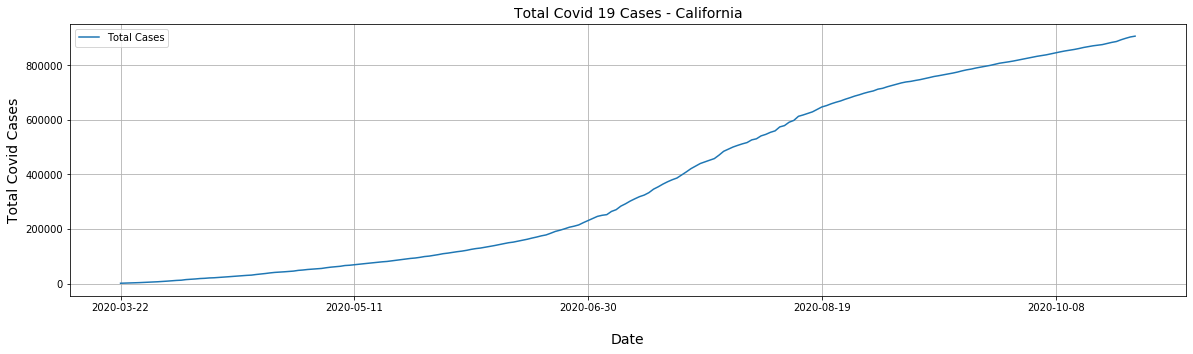

In [25]:
cal_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [58]:
tot_cases_today = last_state_date_df.loc['California']['Total Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2020-10-25: 906,596


### Plot New Coronavirus cases in California

In [27]:
cal_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

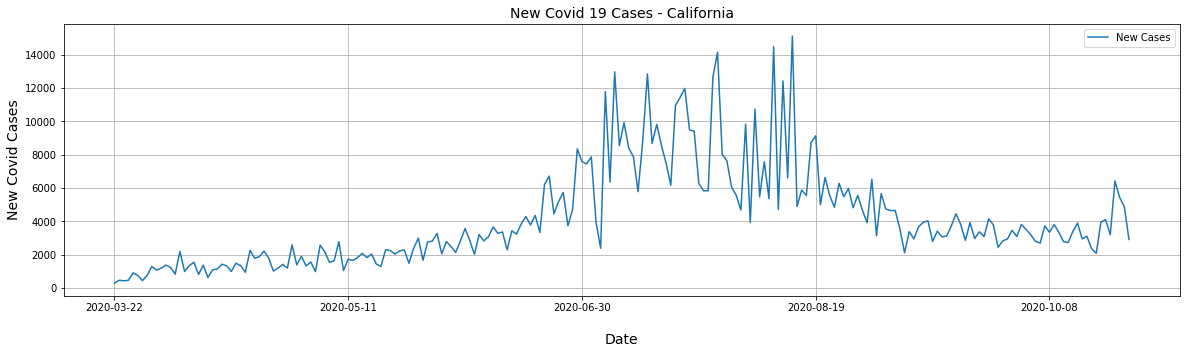

In [28]:
cal_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [29]:
new_cases_today = last_state_date_df.loc['California']['New Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-10-25: 2,912


### Plot Total Coronavirus Deaths in California

In [30]:
cal_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

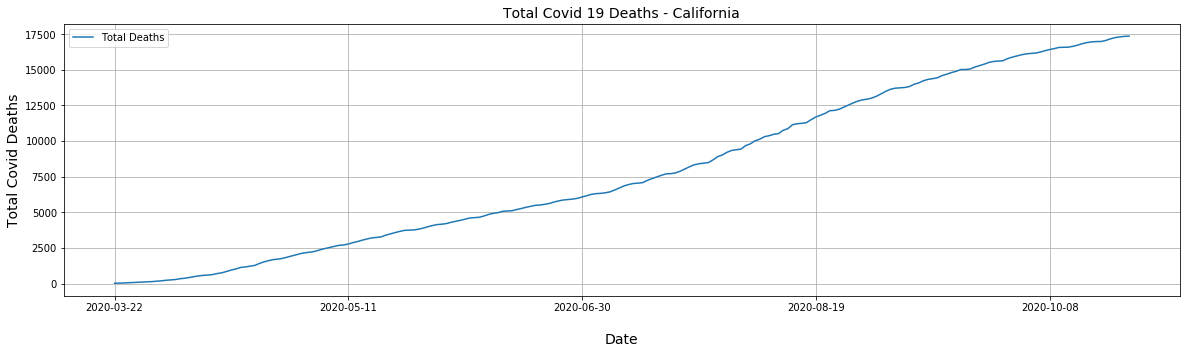

In [31]:
cal_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [32]:
tot_deaths = last_state_date_df.loc['California']['Total Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-10-25: 17,358


### Plot New Coronavirus Deaths in California

In [33]:
cal_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

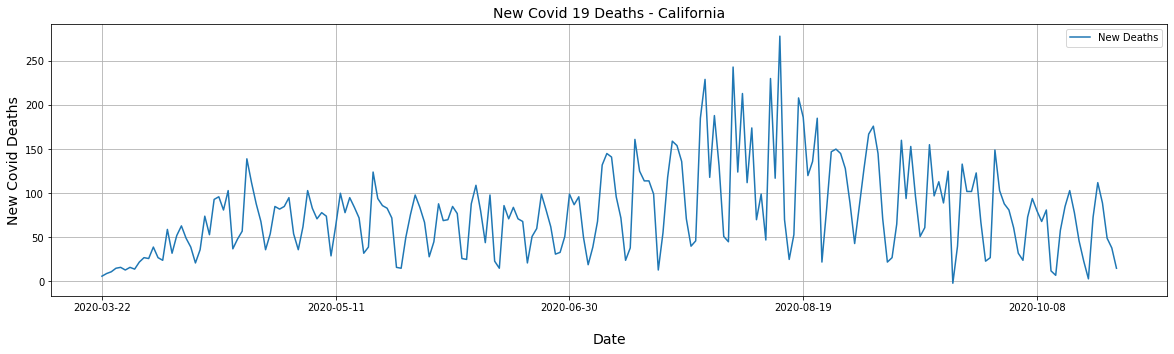

In [34]:
cal_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [35]:
new_deaths = last_state_date_df.loc['California']['New Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-10-25: 15


### Seven Day Average of New Cases and New Deaths in California

In [36]:
my_idx = covid_state_df.index.name
avg_sev_ca_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_ca_df = avg_sev_ca_df.loc['California'].head(7)
ca_date = avg_seven_ca_df['Date'].max()

avg_seven_ca_df = avg_seven_ca_df[['New Cases', 'New Deaths']].mean()
avg_seven_ca_df = pd.DataFrame(avg_seven_ca_df)

new_cases_avg = round(avg_seven_ca_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_ca_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {ca_date}\n')
print(f'The 7 day average of New Cases in CA is {new_cases_avg:,}')
print(f'The 7 day average of New Deaths in CA is {new_deaths_avg:,}')

7 day avg as of: 2020-10-25

The 7 day average of New Cases in CA is 4,415.0
The 7 day average of New Deaths in CA is 54.0


### Total Coronavirus Cases - Los Angeles County, CA

In [37]:
# Create a dataframe based on county information
covid_county_df.sort_values(by='Date', ascending=False, inplace=True)
county_group = covid_county_df.groupby(['State', 'County'])
covid_county_last_df = county_group.first()
covid_county_last_df.sort_values(by=['State', 'Total Cases'], ascending=[False, False], inplace=True)

# Show the total coronavirus cases by county in California
california_cases_by_county_df = covid_county_last_df.loc['California']
california_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Los Angeles,299760,823,6993,4,2020-10-25,34.308284,-118.228241
Riverside,65902,145,1279,0,2020-10-25,33.743150,-115.993358
San Bernardino,62619,266,1072,0,2020-10-25,34.840603,-116.177469
Orange,58573,247,1447,3,2020-10-25,33.701475,-117.764600
San Diego,54583,269,870,2,2020-10-25,33.034846,-116.736533
Kern,33813,38,416,0,2020-10-25,35.343294,-118.727780
Fresno,30752,162,436,0,2020-10-25,36.757339,-119.646695
Sacramento,25372,108,484,0,2020-10-25,38.451068,-121.342537
Santa Clara,24144,130,388,0,2020-10-25,37.231049,-121.697046


### Plot Total Coronavirus Cases in Los Angeles County, CA

Text(0, 0.5, 'Total Coronavirus Cases')

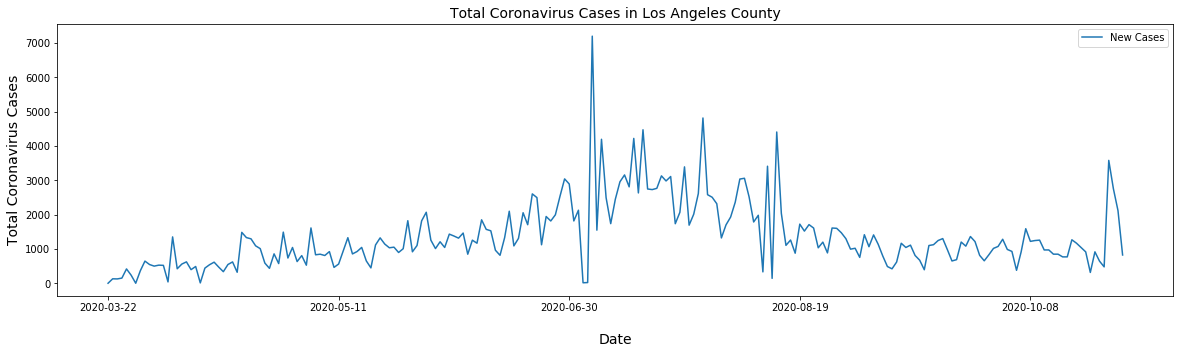

In [38]:
# Plot the number of cases for LA County
la_county_df = covid_county_df.loc['California'][['County','New Cases','Date']]
mask1 = la_county_df['County']=='Los Angeles'
la_county_df=la_county_df[mask1]
la_county_df.sort_values(by='Date', inplace=True)

la_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total Coronavirus Cases in Los Angeles County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total Coronavirus Cases", fontsize=14)

In [39]:
new_cases_df = la_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['California']['New Cases']
date = new_cases_df.loc['California']['Date']
tot_cases = california_cases_by_county_df.loc['Los Angeles']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases:,} cases on {date} in LA County, CA.')

There were 823 new cases reported for a total of 299,760 cases on 2020-10-25 in LA County, CA.


### Seven Day Average of New Cases and New Deaths in Los Angeles County, CA

In [40]:
la_avg_df = covid_county_df.loc['California']
map_county = la_avg_df['County'] == 'Los Angeles'
la_avg_df = la_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
lac_date = la_avg_df['Date'].max()

la_avg_df = la_avg_df[['New Cases', 'New Deaths']].mean()
la_avg_df = pd.DataFrame(la_avg_df)

la_new_cases_avg = round(la_avg_df.loc['New Cases'][0],0)
la_new_deaths_avg = round(la_avg_df.loc['New Deaths'][0],0)

print(f'7 Day Average as of: {lac_date}\n')
print(f'The 7 day average of New Cases in Los Angeles County, CA: {la_new_cases_avg:,}')
print(f'The 7 day average of New Deaths in Los Angeles County, CA: {la_new_deaths_avg:,}')

7 Day Average as of: 2020-10-25

The 7 day average of New Cases in Los Angeles County, CA: 1,616.0
The 7 day average of New Deaths in Los Angeles County, CA: 17.0


### Total Coronavirus cases in Indiana

In [59]:
ind_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

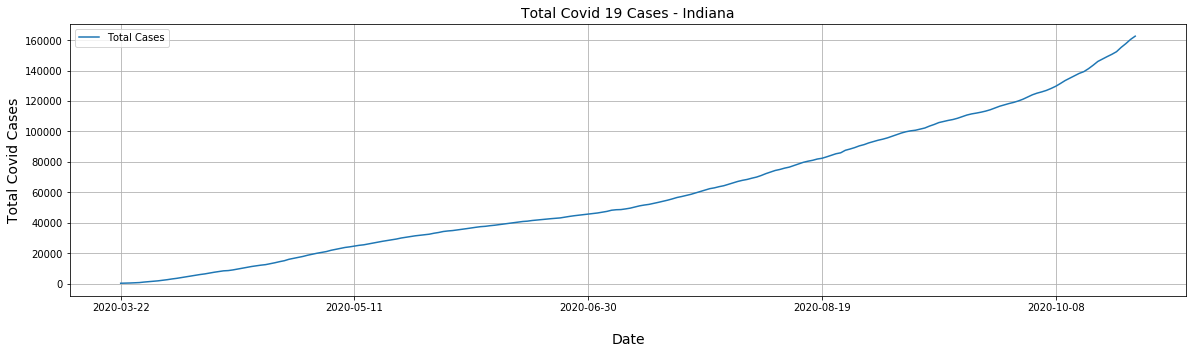

In [42]:
ind_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [43]:
tot_cases_today = last_state_date_df.loc['Indiana']['Total Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2020-10-25: 162,607


### Plot New Coronavirus cases in Indiana

In [44]:
ind_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

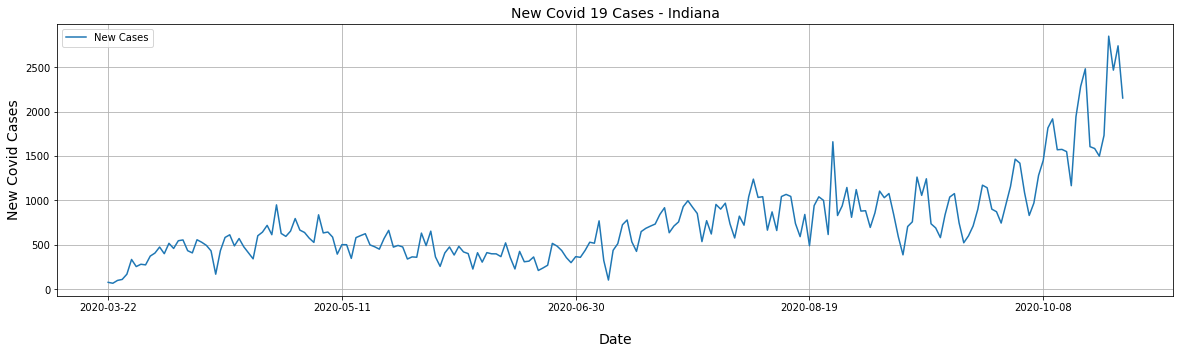

In [45]:
ind_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [46]:
new_cases_today = last_state_date_df.loc['Indiana']['New Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-10-25: 2,153


### Plot Total Coronavirus Deaths in Indiana

In [47]:
ind_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

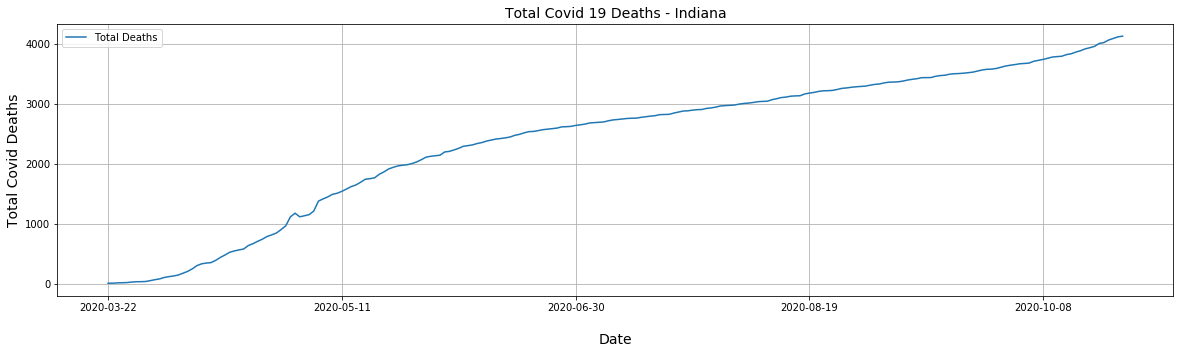

In [48]:
ind_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [49]:
tot_deaths = last_state_date_df.loc['Indiana']['Total Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-10-25: 4,130


### Plot New Coronavirus Deaths in Indiana

In [50]:
ind_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

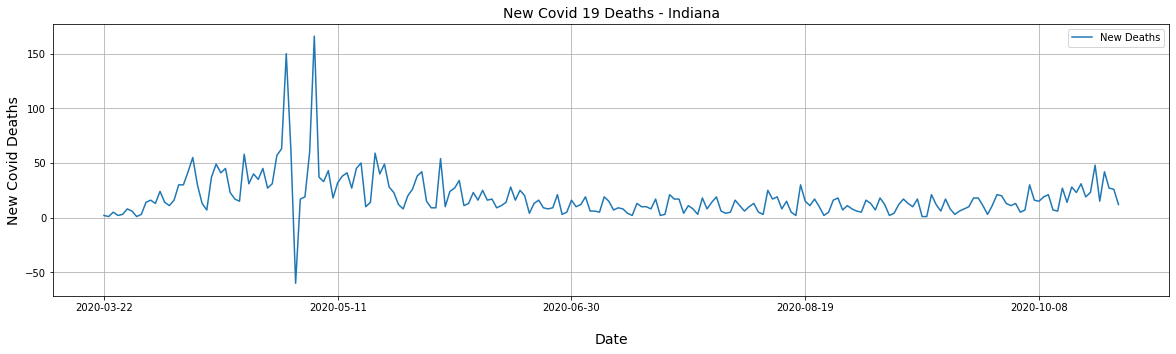

In [51]:
ind_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [52]:
new_deaths = last_state_date_df.loc['Indiana']['New Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-10-25: 12


### Seven Day Average of New Cases and New Deaths in Indiana

In [53]:
my_idx = covid_state_df.index.name
avg_sev_in_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_in_df = avg_sev_in_df.loc['Indiana'].head(7)
in_date = avg_seven_in_df['Date'].max()

avg_seven_in_df = avg_seven_in_df[['New Cases', 'New Deaths']].mean()
avg_seven_in_df = pd.DataFrame(avg_seven_in_df)
# avg_seven_ca_df

new_cases_avg = round(avg_seven_in_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_in_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {in_date}\n')
print(f'The 7 day average of New Cases in IN is {new_cases_avg:,}')
print(f'The 7 day average of New Deaths in IN is {new_deaths_avg:,}')

7 day avg as of: 2020-10-25

The 7 day average of New Cases in IN is 2,146.0
The 7 day average of New Deaths in IN is 28.0


### Coronavirus in Fulton County, IN

In [54]:
# Show the total coronavirus cases by county in Indiana
indiana_cases_by_county_df = covid_county_last_df.loc['Indiana']
indiana_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Marion,25871,180,792,1,2020-10-25,39.781636,-86.138263
Lake,14222,199,358,0,2020-10-25,41.418743,-87.382776
St. Joseph,9532,133,166,1,2020-10-25,41.617568,-86.290408
Elkhart,9156,130,137,0,2020-10-25,41.597612,-85.858757
Allen,8552,128,230,0,2020-10-25,41.091943,-85.068006
Hamilton,6335,42,114,0,2020-10-25,40.073065,-86.052447
Vanderburgh,6090,79,62,1,2020-10-25,38.026588,-87.587631
Tippecanoe,3918,82,15,0,2020-10-25,40.388727,-86.894140
Porter,3416,93,50,0,2020-10-25,41.459869,-87.068489


### Plot Total Coronavirus Cases in Fulton County, IN

Text(0, 0.5, 'Total New Coronavirus Cases')

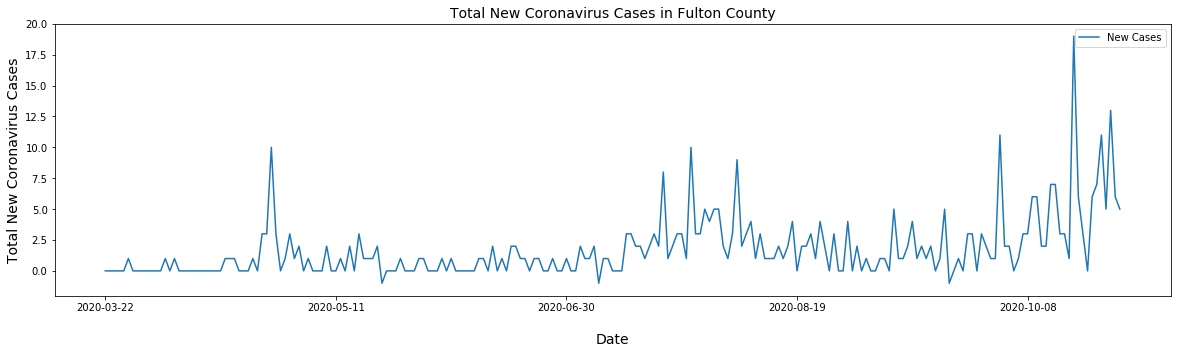

In [55]:
# Plot the number of cases for Fulton County
fulton_county_df = covid_county_df.loc['Indiana'][['County','New Cases','Date']]
mask1 = fulton_county_df['County']=='Fulton'
fulton_county_df=fulton_county_df[mask1]
fulton_county_df.sort_values(by='Date', inplace=True)

fulton_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total New Coronavirus Cases in Fulton County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total New Coronavirus Cases", fontsize=14)

In [56]:
new_cases_df = fulton_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['Indiana']['New Cases']
date = new_cases_df.loc['Indiana']['Date']
tot_cases = indiana_cases_by_county_df.loc['Fulton']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases} cases on {date} in Fulton County, CA.')

There were 5 new cases reported for a total of 376 cases on 2020-10-25 in Fulton County, CA.


### Seven Day Average of New Cases and New Deaths in Fulton County, IN

In [57]:
fc_avg_df = covid_county_df.loc['Indiana']
map_county = fc_avg_df['County'] == 'Fulton'
fc_avg_df = fc_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
fc_date = fc_avg_df['Date'].max()

fc_avg_df = fc_avg_df[['New Cases', 'New Deaths']].mean()
fc_avg_df = pd.DataFrame(fc_avg_df)

fc_new_cases_avg = round(fc_avg_df.loc['New Cases'][0],0)
fc_new_deaths_avg = round(fc_avg_df.loc['New Deaths'][0],2)
print(f'7 day average as of: {fc_date}\n')
print(f'The 7 day average of New Cases in Fulton County, IN is {fc_new_cases_avg:,}')
print(f'The 7 day average of New Deaths in Fulton County, IN is {fc_new_deaths_avg:,}')

7 day average as of: 2020-10-25

The 7 day average of New Cases in Fulton County, IN is 8.0
The 7 day average of New Deaths in Fulton County, IN is 0.29
